<a href="https://colab.research.google.com/github/IE-304/IE-304/blob/main/6.3_RandomForest(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
"""
Created on Sat Jan 20 18:38:15 2018
鄭春生教授，元智大學，工業工程與管理學系
@author: ieccheng
"""

'\nCreated on Sat Jan 20 18:38:15 2018\n鄭春生教授，元智大學，工業工程與管理學系\n@author: ieccheng\n'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
n_Features=5
Pattern_Class=2

In [7]:
# Step 1 讀取資料
'''
# 完整檔案，隨機區分訓練及測試
dataframe = pd.read_csv('XXX.csv')
dataset = dataframe.values
dataset_train, dataset_test= train_test_split(dataset, test_size=.3,
              stratify=dataset[:,n_Features], random_state=9)
X_train_raw = dataset_train[:,0:n_Features]
y_train_raw = dataset_train[:,n_Features]
X_test_raw = dataset_test[:,0:n_Features]
y_test_raw = dataset_test[:,n_Features]
'''

"\n# 完整檔案，隨機區分訓練及測試\ndataframe = pd.read_csv('XXX.csv')\ndataset = dataframe.values\ndataset_train, dataset_test= train_test_split(dataset, test_size=.3, \n              stratify=dataset[:,n_Features], random_state=9)\nX_train_raw = dataset_train[:,0:n_Features]\ny_train_raw = dataset_train[:,n_Features]\nX_test_raw = dataset_test[:,0:n_Features]\ny_test_raw = dataset_test[:,n_Features] \n"

In [8]:
# 已區分訓練測試
dataframe_train = pd.read_csv('https://raw.githubusercontent.com/IE-304/IE-304/refs/heads/main/6.1_Train.csv')
dataset_train = dataframe_train.values
# split into input (X) and output (Y) variables
X_train_raw = dataset_train[:,0:n_Features]
y_train_raw = dataset_train[:,n_Features]

In [9]:
dataframe_test = pd.read_csv('https://raw.githubusercontent.com/IE-304/IE-304/refs/heads/main/6.2_Test.csv')
dataset_test = dataframe_test.values
# split into input (X) and output (Y) variables
X_test_raw = dataset_test[:,0:n_Features]
y_test_raw = dataset_test[:,n_Features]

In [10]:
# Step 2 標準化 (standardization) 或正規化 (normalization)
# scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train_raw) #正規化
scaler = StandardScaler().fit(X_train_raw) #標準化
X_train = scaler.transform(X_train_raw)
y_train = y_train_raw #np_utils.to_categorical(y_train_raw) #視情況決定是否使用此功能

In [11]:
X_test = scaler.transform(X_test_raw)
y_test = y_test_raw #np_utils.to_categorical(y_test_raw) #視情況決定是否使用此功能

In [12]:
# Step 3 宣告模型
# Random Forest
# RF 可以利用設定 random_state 控制隨機性
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, max_depth=12,
                             min_samples_split=2, min_samples_leaf=1,
                             max_features='sqrt', random_state=None)
# max_features='auto'; 'sqrt'; 'log2'; None (=n_festures)
# 'auto'='sqrt'

In [13]:
# Step 4 擬合模型
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=500)

Step 5 計算績效指標

In [14]:
y_pred=model.predict(X_test)
correct = np.where(y_pred==y_test)[0]
print ("Found %d correct labels" % len(correct))
incorrect = np.where(y_pred!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 24 correct labels
Found 1 incorrect labels


In [15]:
target_names = ["Class {}".format(i) for i in range(Pattern_Class)]
print(confusion_matrix(y_test, y_pred))
print('\n accuracy:\n', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
print('\n')

[[11  0]
 [ 1 13]]

 accuracy:
 0.96
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96        11
     Class 1       1.00      0.93      0.96        14

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25





In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11  0]
 [ 1 13]]


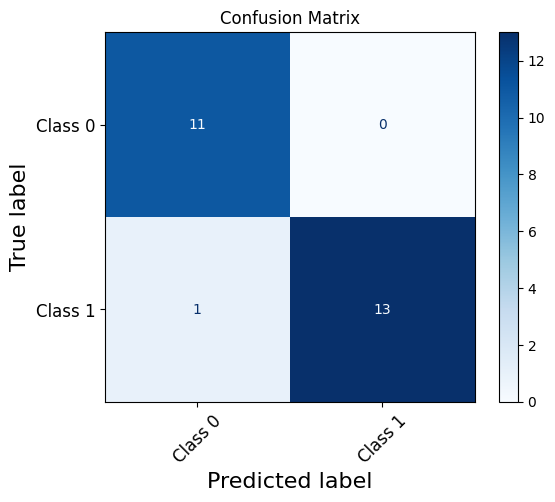

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45,values_format='.2g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted label',fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('True label',fontsize=16)
plt.yticks(fontsize=12)
plt.show()